# ADA final exam

## Deadline
_Friday, January 19, 2018, at 19:15 CET_


## Important notes

* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will monitor the network for unusual activities.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Make sure you upload your iPython Notebook (1 file) with [this form](https://goo.gl/forms/JKPX74ZH707sB7Up1) at the end of the exam, with all the cells already evaluated (except for the Spark-related question 1.4).
* Complete all the fields in the form, and name your file following the format "NameSurname_sciper.ipynb". The form will be open to submissions until 19:20 (strict deadline). Late submissions will not be accepted.

# Design the Pokedex 2.0

![banner](images/dataset-cover.jpg)

Pokémon are small creatures that fight in competitions. All Pokémon have different numerical characteristics (strength of attack, defense, etc.) and belong to one or two so-called classes (water, fire, etc.).
[Professor Oak](https://www.pojo.com/cartoon/Oak.gif) is the inventor of the [Pokedex](https://en.wikipedia.org/wiki/Gameplay_of_Pok%C3%A9mon#Pok%C3%A9dex), a useful portable device that keeps information about all the Pokémon available. As his lead data scientist, you just received a request from him asking you to update the software on all Pokedex devices. In this exam, you will work toward improving the Pokedex by (1) exploring a dataset of Pokémon and the battles they fight, (2) developing a model for predicting the outcome of battles between Pokémon, and (3) devising a method for ranking Pokémon by their overall strength.

## Dataset description
Professor Oak has dumped the memory of one Pokedex device, resulting in the dataset you’ll work with in this exam.

### [pokemon.csv](pokemon.csv)

In this file, each row represents the features of one Pokémon.

* pid: Numeric - ID of the Pokémon
* HP: Numeric - Health points
* Attack: Numeric - Strength of the regular attack
* Defense: Numeric - Strength of the regular defense
* Sp. Atk: Numeric - Strength of the special attack
* Sp. Def: Numeric - Strength of the special defense
* Speed: Numeric - Moving speed
* Legendary: Boolean - ‘True’ if the Pokémon is rare
* Class 1: Categorical - Pokémon class
* Class 2: Categorical - Pokémon class

Please note that a Pokémon can have either one or two classes. If a Pokémon has two classes, they are both considered to have the same importance.

### [combats.csv](combats.csv)

In this file, each row represents the outcome of one battle between two Pokémon.

* First_pokemon: Numeric - ID (match with pid)
* Second_pokemon: Numeric - ID (match with pid)
* Winner: Numeric - ID of the winner


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Question 1: Exploring the data - 30 points
In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

1. (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [5]:
pokemon = pd.read_csv('pokemon.csv')
combats = pd.read_csv('combats.csv')

In [14]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [12]:
pokemon['Class 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

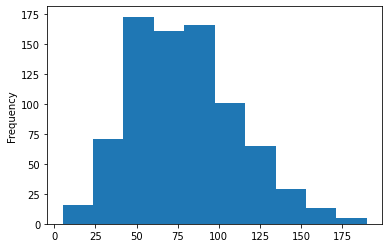

In [16]:
pokemon.Attack.plot.hist()

<AxesSubplot:ylabel='Frequency'>

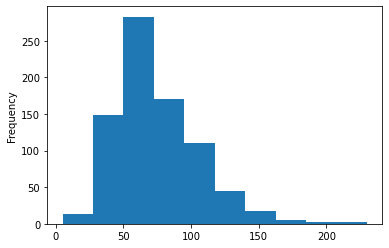

In [18]:
pokemon.Defense.plot.hist()

2. (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
   1. visualize the relation between these two variables using an appropriate plot;
   2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
   3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;
   4. list the names of the 10 Pokémon with the largest number of victories.


3. (10 points) Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.
   Note: If there are Pokémon that are in both classes, discard them.
   Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.


4. (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
   Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.

## Question 2: Prediction - 40 points
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

1. (3 points) Generate the feature vectors and the labels to train your model.
2. (5 points) How does your model handle categorical features and Pokémon with multiple classes?
3. (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.
4. (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?
5. (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).
6. (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.
7. (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

## Question 3: Ranking - 30 points
Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.
1. (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.

2. (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.
3. (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.
4. (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?
5. (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.


### Good luck!
